In [18]:

import numpy as np
import math
from matplotlib import pyplot as plt
import random

## Modelo LIF - Equação do potencial

In [19]:
def potencial_lif(R, EL, Is, V0, tao, t):
    return (EL+(R*Is))+((V0-EL-(R*Is))*math.exp(-t/tao))

## Dinâmica da geração de impulsos

14
29
44
59
74
89
Quantidade de Pulsos gerada: 6.0


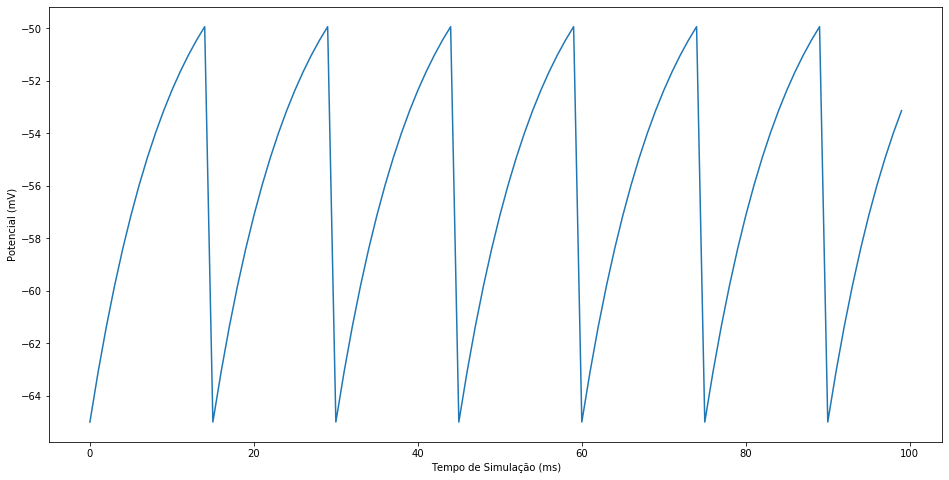

In [20]:
Is = 5
T = 100
R = 5
EL = -70
tao = 10
V0 = -65
Vth = -50

timer = 0
Vt = np.zeros(T)
ST = np.zeros(T)
for t in range(T):
    v = potencial_lif(R, EL, Is, V0, tao, timer)
    Vt[t] = v
    if (v >= Vth):
        v = EL
        timer = 0
        ST[t] = 1
        print(t)
    else:
        timer += 1

print('Quantidade de Pulsos gerada:', ST[np.where(ST == 1)].sum())

fig, ax = plt.subplots()
ax.plot(Vt)
ax.set(xlabel='Tempo de Simulação (ms)', ylabel='Potencial (mV)')
fig.set_figwidth(16)
fig.set_figheight(8)
plt.show()

In [21]:
coords = "{"
for t in range(T):
    coords += "({}, {})".format(t, round(Vt[t], 2))
coords += "}"
print(coords)

{(0, -65.0)(1, -63.1)(2, -61.37)(3, -59.82)(4, -58.41)(5, -57.13)(6, -55.98)(7, -54.93)(8, -53.99)(9, -53.13)(10, -52.36)(11, -51.66)(12, -51.02)(13, -50.45)(14, -49.93)(15, -65.0)(16, -63.1)(17, -61.37)(18, -59.82)(19, -58.41)(20, -57.13)(21, -55.98)(22, -54.93)(23, -53.99)(24, -53.13)(25, -52.36)(26, -51.66)(27, -51.02)(28, -50.45)(29, -49.93)(30, -65.0)(31, -63.1)(32, -61.37)(33, -59.82)(34, -58.41)(35, -57.13)(36, -55.98)(37, -54.93)(38, -53.99)(39, -53.13)(40, -52.36)(41, -51.66)(42, -51.02)(43, -50.45)(44, -49.93)(45, -65.0)(46, -63.1)(47, -61.37)(48, -59.82)(49, -58.41)(50, -57.13)(51, -55.98)(52, -54.93)(53, -53.99)(54, -53.13)(55, -52.36)(56, -51.66)(57, -51.02)(58, -50.45)(59, -49.93)(60, -65.0)(61, -63.1)(62, -61.37)(63, -59.82)(64, -58.41)(65, -57.13)(66, -55.98)(67, -54.93)(68, -53.99)(69, -53.13)(70, -52.36)(71, -51.66)(72, -51.02)(73, -50.45)(74, -49.93)(75, -65.0)(76, -63.1)(77, -61.37)(78, -59.82)(79, -58.41)(80, -57.13)(81, -55.98)(82, -54.93)(83, -53.99)(84, -53.13)(

## Influência da Corrente Sináptica na Geração de Impulsos

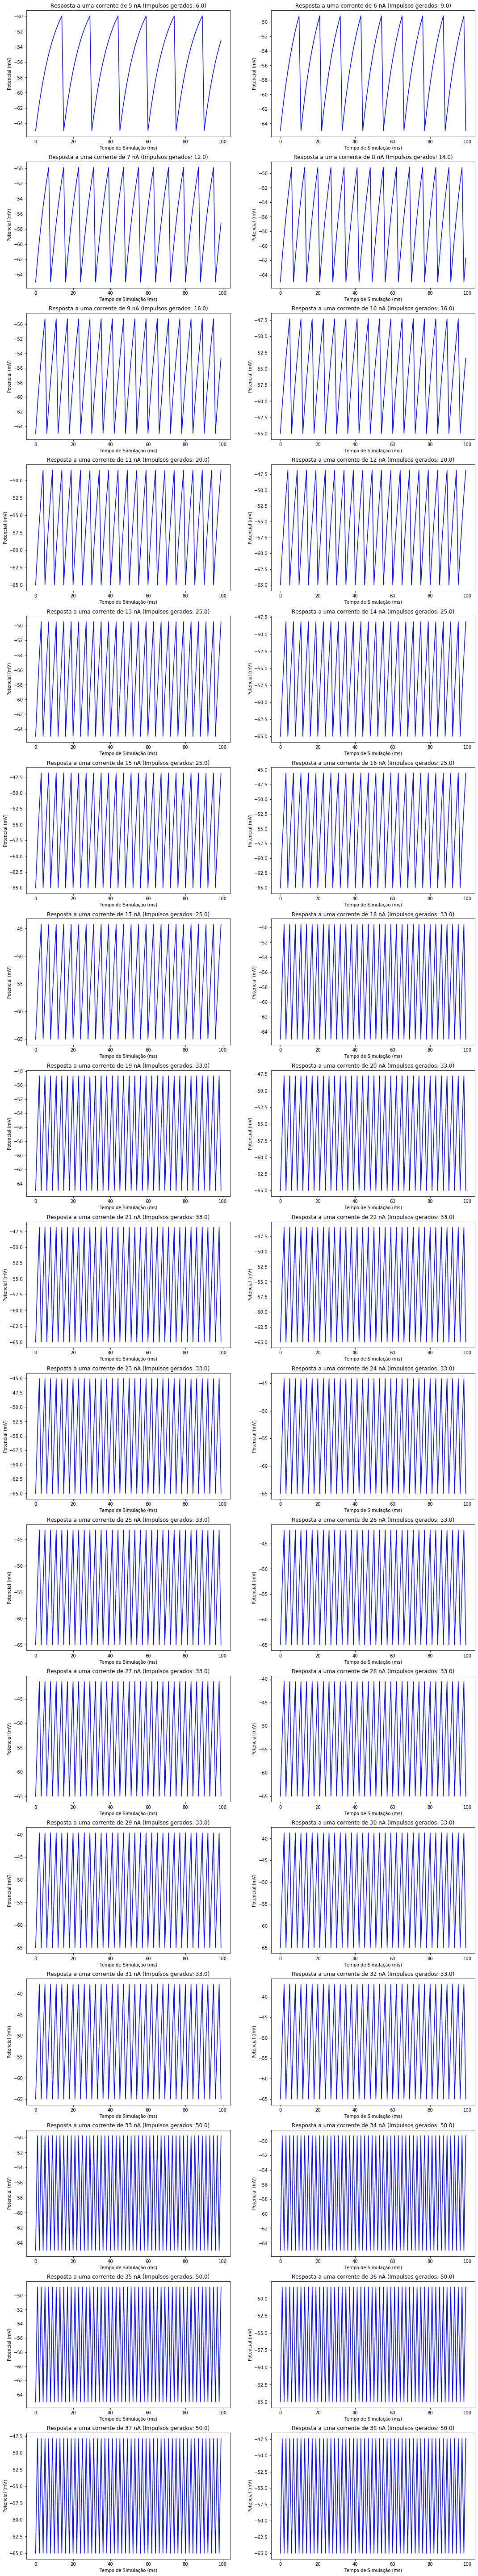

In [22]:
I_s = range(5, 40)
samp_size = len(I_s) #precisa ser par

T = 100
R = 5
EL = -70
tao = 10
V0 = -65
Vth = -50


Vs = np.zeros((samp_size, T))
STs = np.zeros((samp_size, T))
Spk_count = np.zeros(samp_size)
for i in range(samp_size):
    timer = 0
    count = 0
    for t in range(T):
        v = potencial_lif(R, EL, I_s[i], V0, tao, timer)
        Vs[i][t] = v
        if (v >= Vth):
            v = EL
            timer = 0
            count += 1
        else:
            timer += 1
    Spk_count[i] = count



#fig, axs = plt.subplots(len(I_s))
fig, axs = plt.subplots(int(samp_size/2), 2)
#fig.suptitle('Influência da corrente pós-sináptica na geração de impulsos')
count = 0
for i in range(int(samp_size/2)):
    for j in range(2):
        axs[i][j].set(xlabel='Tempo de Simulação (ms)', ylabel='Potencial (mV)')
        axs[i][j].set_title("Resposta a uma corrente de {} nA (Impulsos gerados: {})".format(I_s[count], Spk_count[count]))
        #axs[i][j].
        axs[i][j].plot(Vs[count], color='blue')
        count+=1
    
fig.set_figwidth(18)
fig.set_figheight(len(I_s)*3)
plt.show()

## Extraíndo as correntes máximas e mínimas

In [23]:
def current_lif (R, EL, V0, tao, Vth, t):
    return ((EL-V0)-((EL-Vth)*math.exp(t/tao)))/(R*(math.exp(t/tao)-1))

I_max = math.ceil(current_lif(R, EL, V0, tao, Vth, 1))
I_min = math.ceil(current_lif(R, EL, V0, tao, Vth, T))
print('Corrente Máxima (1 impulso por ms): {}nA'.format(I_max))
print('Corrente Mínima (1 impulso por Tms, onde T é o tempo total): {}nA'.format(I_min))

Corrente Máxima (1 impulso por ms): 33nA
Corrente Mínima (1 impulso por Tms, onde T é o tempo total): 5nA


## Relação entre Corrente e Tempo de disparo

In [24]:
def spike_interval_lif(R, EL, Is, V0, tao, Vth):
    return tao*math.log((EL+(R*Is)-V0)/(EL+(R*Is)-Vth))

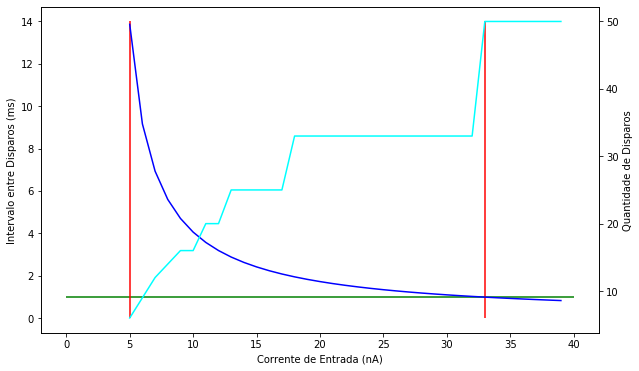

In [25]:

Spi = np.zeros(samp_size)
Sfi = np.zeros(samp_size)
for i in range(samp_size):
    Spi[i] = spike_interval_lif(R, EL, I_s[i], V0, tao, Vth)
    Sfi[i] = 1/Spi[i]

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(I_s, Spi, color='blue')
ax.set(xlabel='Corrente de Entrada (nA)', ylabel='Intervalo entre Disparos (ms)')
ax.hlines(1, 0, 40, colors="green")
ax.vlines([I_min, I_max], 0, 14, colors='red')
ax2.plot(I_s, Spk_count, color='cyan')
ax2.set_ylabel('Quantidade de Disparos')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()


In [26]:
coords = "{"
for s in range(samp_size):
    coords += "({}, {})".format(round(I_s[s],5), round(Spi[s], 5))
coords += "}"
print(coords)

{(5, 13.86294)(6, 9.16291)(7, 6.93147)(8, 5.59616)(9, 4.70004)(10, 4.05465)(11, 3.56675)(12, 3.18454)(13, 2.87682)(14, 2.62364)(15, 2.41162)(16, 2.23144)(17, 2.07639)(18, 1.94156)(19, 1.82322)(20, 1.7185)(21, 1.62519)(22, 1.54151)(23, 1.46603)(24, 1.39762)(25, 1.33531)(26, 1.27833)(27, 1.22602)(28, 1.17783)(29, 1.13329)(30, 1.09199)(31, 1.05361)(32, 1.01783)(33, 0.9844)(34, 0.9531)(35, 0.92373)(36, 0.89612)(37, 0.87011)(38, 0.84557)(39, 0.82238)}


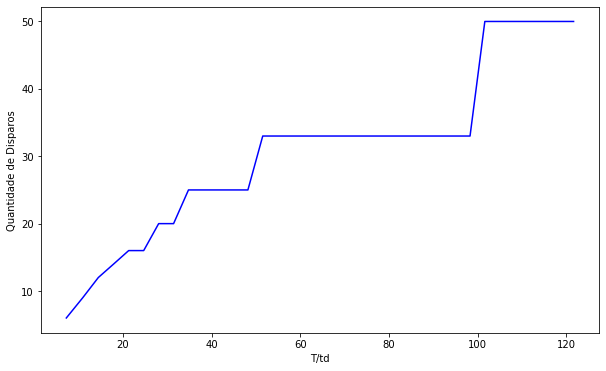

In [27]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(T/Spi,Spk_count, color='blue')
ax.set(xlabel='T/td', ylabel='Quantidade de Disparos')
#ax.hlines(1, 0, 40, colors="green")
#ax.vlines([I_min, I_max], 0, 14, colors='red')
#ax2.plot(I_s, Spk_count, color='cyan')
#ax2.set_ylabel('Quantidade de Disparos')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()


Quantidade de Pulsos gerada: 50


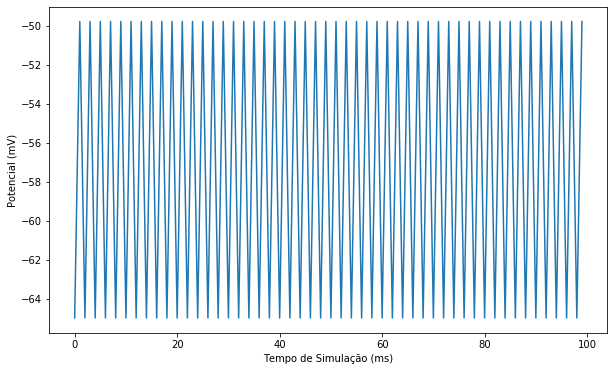

In [28]:
timer = 0
Vt = np.zeros(T)
ST = np.zeros(T)

count = 0
for t in range(T):
    v = potencial_lif(R, EL, I_max, V0, tao, timer)
    Vt[t] = v
    if (v >= Vth):
        v = EL
        timer = 0
        count += 1
    else:
        timer += 1
        
print('Quantidade de Pulsos gerada:', count)

fig, ax = plt.subplots()
ax.plot(Vt)
ax.set(xlabel='Tempo de Simulação (ms)', ylabel='Potencial (mV)')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()

Quantidade de Pulsos gerada: 6


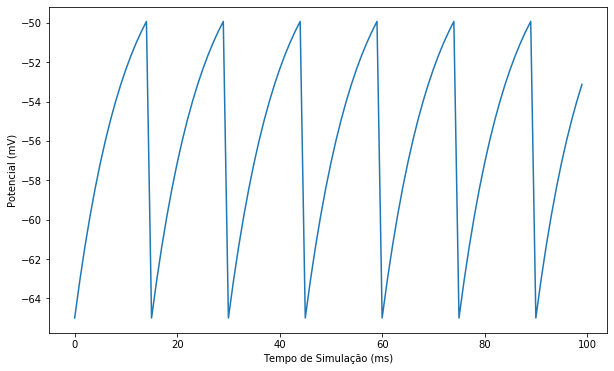

In [29]:
timer = 0
Vt = np.zeros(T)
ST = np.zeros(T)

count = 0
for t in range(T):
    v = potencial_lif(R, EL, I_min+0.0001, V0, tao, timer)
    Vt[t] = v
    if (v >= Vth):
        v = EL
        timer = 0
        count += 1
    else:
        timer += 1
        
print('Quantidade de Pulsos gerada:', count)

fig, ax = plt.subplots()
ax.plot(Vt)
ax.set(xlabel='Tempo de Simulação (ms)', ylabel='Potencial (mV)')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()

## Amostragem dentro dos limites de corrente

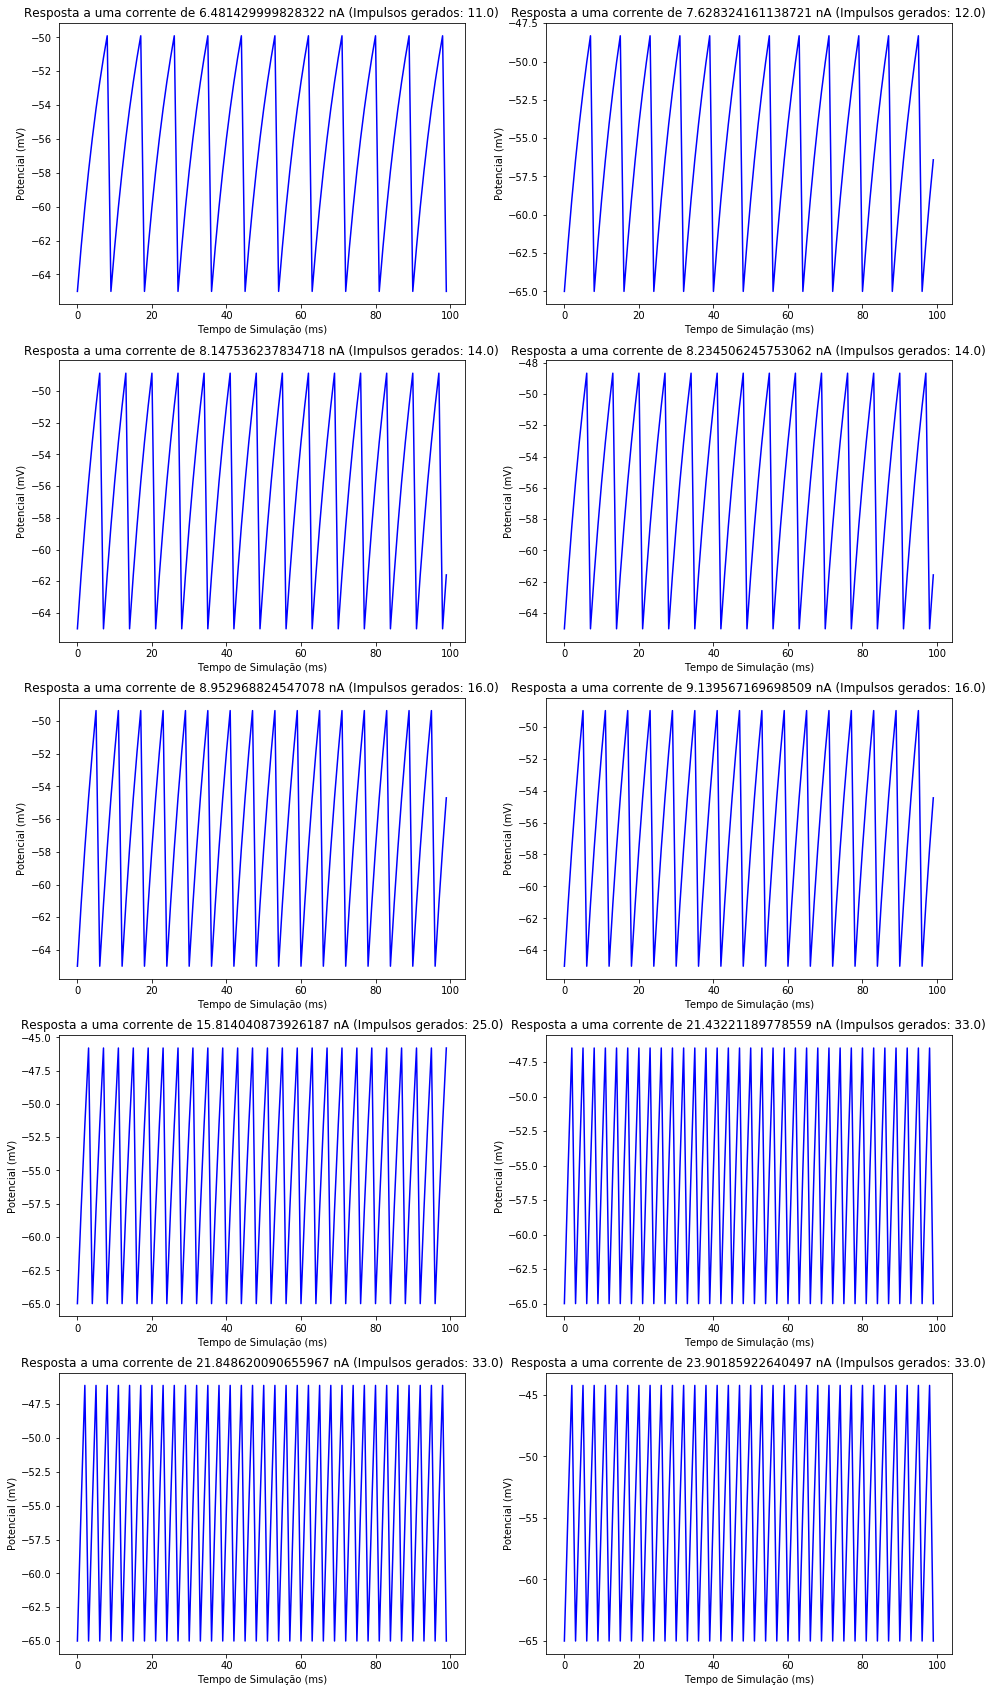

In [30]:
samp_size = 10
I_samples = []
for i in range(samp_size):
    I_samples.append(random.uniform(I_min, I_max))

I_samples.sort() 
T = 100
R = 5
EL = -70
tao = 10
V0 = -65
Vth = -50

Vs = np.zeros((samp_size, T))
STs = np.zeros((samp_size, T))
Spk_count = np.zeros(samp_size)

for i in range(samp_size):
    timer = 0
    count = 0
    for t in range(T):
        v = potencial_lif(R, EL, I_samples[i], V0, tao, timer)
        Vs[i][t] = v
        if (v >= Vth):
            v = EL
            timer = 0
            count += 1
        else:
            timer += 1
    Spk_count[i] = count#STs[i][np.where(STs[i] == 1)].sum()
    
fig, axs = plt.subplots(int(samp_size/2), 2)
count = 0
for i in range(int(samp_size/2)):
    for j in range(2):
        axs[i][j].set(xlabel='Tempo de Simulação (ms)', ylabel='Potencial (mV)')
        axs[i][j].set_title("Resposta a uma corrente de {} nA (Impulsos gerados: {})".format(I_samples[count], Spk_count[count]))
        axs[i][j].plot(Vs[count], color='blue')
        count += 1
    
fig.set_figwidth(16)
fig.set_figheight(30)
plt.show()
        

## Corrente X Quantidade de Impulsos

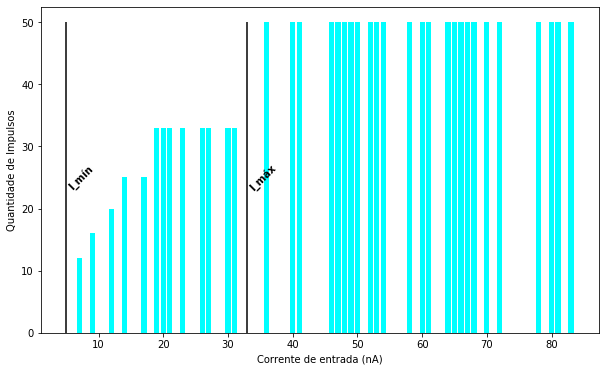

In [31]:
# Range de correntes que ultrapassam os limites Máximo e Mínimo
samp_size = 50
epsilon = 50
I_samples = []
for i in range(samp_size):
    I_samples.append(random.randint(I_min, I_max+epsilon))

I_samples.sort() 

T = 100
R = 5
EL = -70
tao = 10
V0 = -65
Vth = -50

Vs = np.zeros((samp_size, T))
STs = np.zeros((samp_size, T))
Spk_count = np.zeros(samp_size)

for i in range(samp_size):
    timer = 0
    count = 0
    for t in range(T):
        v = potencial_lif(R, EL, I_samples[i], V0, tao, timer)
        Vs[i][t] = v
        if (v >= Vth):
            v = EL
            timer = 0
            count += 1
        else:
            timer += 1
    Spk_count[i] = count#STs[i][np.where(STs[i] == 1)].sum()

fig, ax = plt.subplots()
ax.set_xlabel("Corrente de entrada (nA)")
ax.set_ylabel("Quantidade de Impulsos")
ax.bar(I_samples, Spk_count, color='cyan')
ax.vlines([I_min, I_max], 0, 50, colors="black")
plt.text(I_min, 25, "I_mín", rotation=45, verticalalignment='center').set_fontweight('bold')
plt.text(I_max, 25, "I_máx", rotation=45, verticalalignment='center').set_fontweight('bold')
fig.set_figwidth(10)
fig.set_figheight(6) 
plt.show()

## Geração das Correntes por Rótulo utilizando correntes constantes uniformes

In [32]:
def label_currents (Nc, Imax, Imin):
    I_labels = np.zeros(Nc)
    for r in range(Nc):
        ir = Imin + r*((Imax-Imin)/(Nc-1))
        I_labels[r] = ir
    return I_labels

[ 5.          8.11111111 11.22222222 14.33333333 17.44444444 20.55555556
 23.66666667 26.77777778 29.88888889 33.        ]


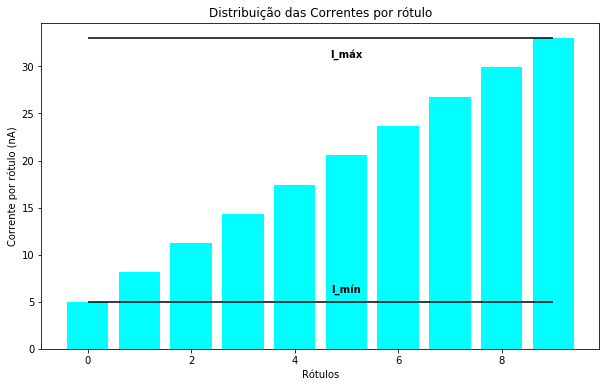

In [33]:
Nc = 10
labels = list(range(Nc))
I_labels = label_currents(Nc, I_max, I_min)
print(I_labels)
fig, ax = plt.subplots()
ax.set_title('Distribuição das Correntes por rótulo')
ax.set_xlabel("Rótulos")
ax.set_ylabel("Corrente por rótulo (nA)")
ax.bar(labels, I_labels, color='cyan')
ax.hlines([I_min, I_max], 0, Nc-1, colors='black')
plt.text(5, I_min+1, "I_mín", rotation=0, horizontalalignment='center').set_fontweight('bold')
plt.text(5, I_max-2, "I_máx", rotation=0, horizontalalignment='center').set_fontweight('bold')
fig.set_figwidth(10)
fig.set_figheight(6) 
plt.show()

In [36]:
coords = "{"
for s in range(Nc):
    coords += "({}, {})".format(labels[s], I_labels[s])
coords += "}"
print(coords)

{(0, 5.0)(1, 8.11111111111111)(2, 11.222222222222221)(3, 14.333333333333334)(4, 17.444444444444443)(5, 20.555555555555557)(6, 23.666666666666668)(7, 26.77777777777778)(8, 29.88888888888889)(9, 33.0)}


## Quantidade e Tempos de disparo por rótulo

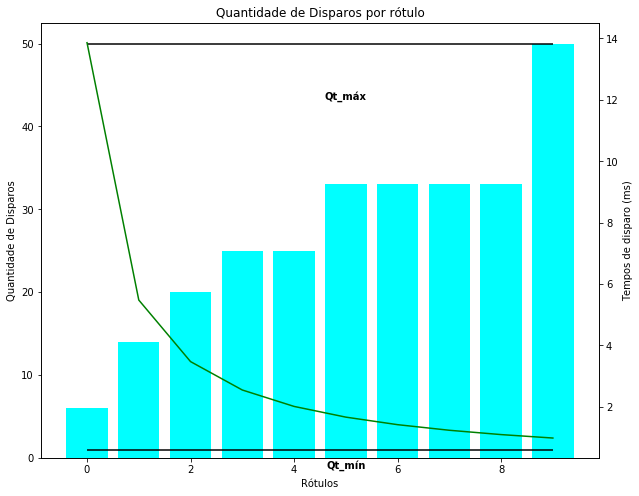

In [132]:
T = 100
R = 5
EL = -70
tao = 10
V0 = -65
Vth = -50

Vs = np.zeros((Nc, T))
STs = np.zeros((Nc, T))
Spk_count = np.zeros(Nc)
for i in range(Nc):
    timer = 0
    count = 0
    
    for t in range(T):
        v = potencial_lif(R, EL, I_labels[i], V0, tao, timer)
        Vs[i][t] = v
        if (v >= Vth):
            v = EL
            timer = 0
            STs[i,t] = 1
            count += 1
        else:
            timer += 1
    Spk_count[i] = count

Spi = np.zeros(Nc)
Sfi = np.zeros(Nc)
for i in range(Nc):
    Spi[i] = spike_interval_lif(R, EL, I_labels[i], V0, tao, Vth)
    Sfi[i] = 1/Spi[i]
    
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.set_ylabel('Tempos de disparo (ms)')
ax2.plot(Spi, color='green')
ax.set_title('Quantidade de Disparos por rótulo')
ax.set_xlabel("Rótulos")
ax.set_ylabel("Quantidade de Disparos")
ax.bar(labels, Spk_count, color='cyan')
ax.hlines([1, 50], 0, Nc-1, colors='black')
plt.text(5, 0, "Qt_mín", rotation=0, horizontalalignment='center').set_fontweight('bold')
plt.text(5, 12, "Qt_máx", rotation=0, horizontalalignment='center').set_fontweight('bold')
fig.set_figwidth(10)
fig.set_figheight(8) 
plt.show()


In [142]:
for i in range(Nc):
    print("Tempos de disparo na linha do tempo para o rotulo {}:".format(i))
    td = []
    n = int(T/Spi[i])
    for k in range(n):
        td.append(round((k+1)*Spi[i], 2))
    print(td)     

Tempos de disparo na linha do tempo para o rotulo 0:
[13.86, 27.73, 41.59, 55.45, 69.31, 83.18, 97.04]
Tempos de disparo na linha do tempo para o rotulo 1:
[5.48, 10.96, 16.44, 21.92, 27.4, 32.88, 38.36, 43.84, 49.32, 54.8, 60.28, 65.76, 71.24, 76.72, 82.19, 87.67, 93.15, 98.63]
Tempos de disparo na linha do tempo para o rotulo 2:
[3.47, 6.95, 10.42, 13.9, 17.37, 20.84, 24.32, 27.79, 31.27, 34.74, 38.21, 41.69, 45.16, 48.64, 52.11, 55.58, 59.06, 62.53, 66.01, 69.48, 72.95, 76.43, 79.9, 83.38, 86.85, 90.32, 93.8, 97.27]
Tempos de disparo na linha do tempo para o rotulo 3:
[2.55, 5.1, 7.65, 10.2, 12.74, 15.29, 17.84, 20.39, 22.94, 25.49, 28.04, 30.59, 33.14, 35.68, 38.23, 40.78, 43.33, 45.88, 48.43, 50.98, 53.53, 56.08, 58.63, 61.17, 63.72, 66.27, 68.82, 71.37, 73.92, 76.47, 79.02, 81.57, 84.11, 86.66, 89.21, 91.76, 94.31, 96.86, 99.41]
Tempos de disparo na linha do tempo para o rotulo 4:
[2.01, 4.03, 6.04, 8.06, 10.07, 12.09, 14.1, 16.11, 18.13, 20.14, 22.16, 24.17, 26.18, 28.2, 30.21, 

## Geração de Impulsos por Rótulo, seguindo a metodologia da corrente constante uniforme.

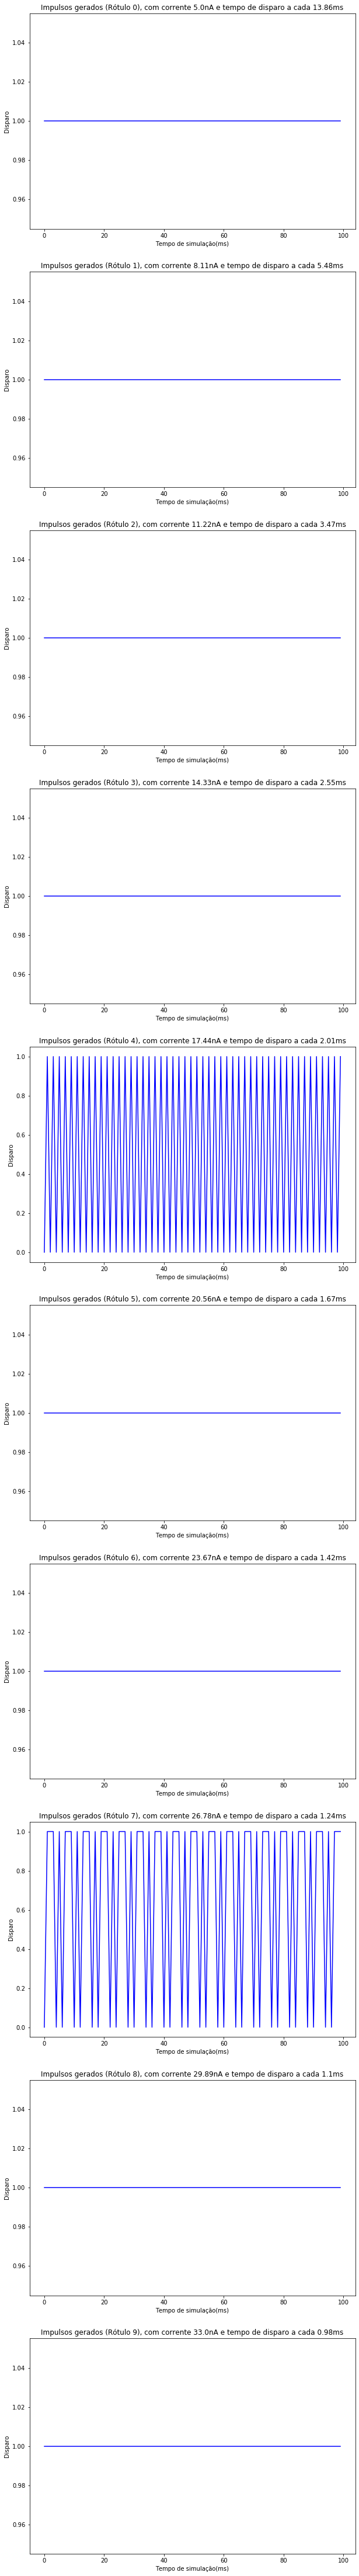

In [134]:
fig, ax = plt.subplots(Nc)
for r in range(Nc):
    ax[r].set_title('Impulsos gerados (Rótulo {}), com corrente {}nA e tempo de disparo a cada {}ms'.format(r, round(I_labels[r], 2),round(Spi[r], 2)))
    ax[r].set_xlabel('Tempo de simulação(ms)')
    ax[r].set_ylabel('Disparo')
    ax[r].plot(STs[r], color='blue')
fig.set_figwidth(10)
fig.set_figheight(80) 
plt.show()
